In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5bdb8000 @  0x7f40705172a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-01 08:55:11--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-12-01 08:55:11 (50.7 MB/s) - ‘helper.py’ saved [2813/2813]



In [0]:
%matplotlib inline
import numpy as np
import torch

import imp 
helper = imp.new_module('helper')
exec(open("/content/helper.py").read(), helper.__dict__)

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


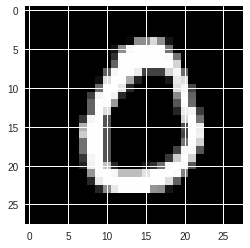

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [0]:
#output
torch.manual_seed(9)

def activation(x):
  return 1 / (1 + torch.exp(-x))

# Flatten the input
inputs = images.view(images.shape[0], -1)

# Create parameters
W1 = torch.randn(784, 256)
b1 = torch.randn(256)

W2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, W1) + b1)

output = torch.mm(h, W2) + b2
output.shape


torch.Size([64, 10])

In [0]:
# softmax

def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1, 1)

probabilities = softmax(output)

probabilities.sum(dim=1)

tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000])

In [0]:
## Pytorch NN module

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)
    # output layer, 10 units
    self.output = nn.Linear(256, 10)
    
    # Define sigmoid activation and softmax
    self.sigmoid = nn.Sigmoid()
    self.sotfmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    # pass the input tensor through each operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x
    

In [0]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (sotfmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # inputs to hidden layer transformation
    self.hidden = nn.Linear(784, 256)
    # output layer, 10 units
    self.output = nn.Linear(256, 10)
    
  def forward(self, x):
    # hidden layer with sigmoid function
    x = F.sigmoid(self.hidden(x))
    # output layer with softmax
    x = F.softmax(self.output(x), dim = 1)
    
    return x